---
Logistic Regression using scikit-learn
---

This notebook is all about creating a simple model using a small dataset to demonstrate Logistic Regression using
scikit-learn

In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#confusion matrix
from sklearn import metrics

%matplotlib inline

In [9]:
digits = load_digits()
digits.data.shape

(1797, 64)

### Show sample images and labels

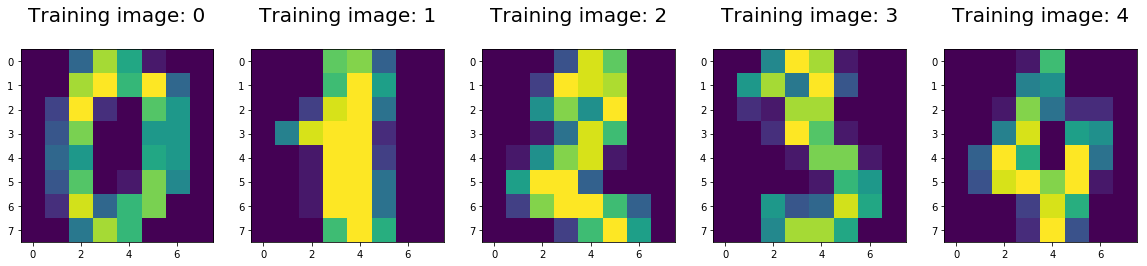

In [19]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)))
    plt.title('Training image: %i\n' % label, fontsize = 20)

### Splitting data into train, validation and test set

In [22]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(1347, 64) (1347,)
(450, 64) (450,)


### Train the model

In [34]:
from sklearn.linear_model import LogisticRegression

# make an instance of the model
logisticRegr = LogisticRegression()
''' logisticRegr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                  intercept_scaling=1, max_iter=1000, multi_class='multinomial',
                  n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
                  tol=0.0001, verbose=0, warm_start=False)'''

# fit the digit data and label
logisticRegr.fit(x_train, y_train)
# Predict
y_pred = logisticRegr.predict(x_test)
y_pred.shape

/Users/prakriti/anaconda/envs/ml_100/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/prakriti/anaconda/envs/ml_100/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(450,)

----
Measuring performance of the model
----

In [37]:
score = metrics.accuracy_score(y_test, y_pred)
print(score)

0.9533333333333334


### Confusion matrix

In [70]:
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap='Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title, size=15)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, ["0","1","2","3","4","5","6","7","8","9"], rotation=45, size=10)
    plt.yticks(tick_marks, ["0","1","2","3","4","5","6","7","8","9"], size=10)
    plt.tight_layout()
    plt.ylabel('Actual Label', size=15)
    plt.xlabel('Predicted Label', size=15)
    width, height = cm.shape
    
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y,x),
                         horizontalalignment='center',
                         verticalalignment='center')         
    

Confusion Matrix
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


<Figure size 432x288 with 0 Axes>

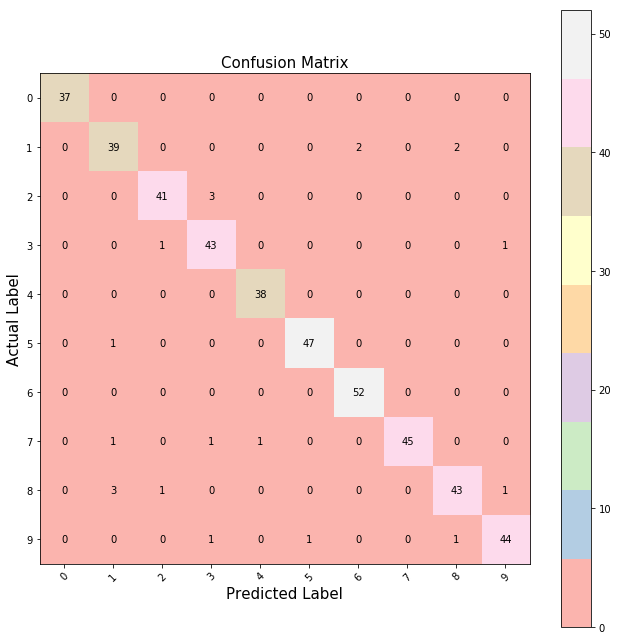

In [71]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(confusion)
plt.show()